## **Preposessing Dataset Training**

---

NIM/NAMA     : 10120729/Rissopan Panji Prayogi

## Installing Package

In [3]:
! pip install sastrawi

## Import Library

In [4]:
import pandas as pd
import numpy
import collections
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from nltk import tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

import warnings
warnings.filterwarnings("ignore")

from IPython.display import display, HTML

# Load Data

In [5]:

train_data = pd.DataFrame({
    'full_text': [
        "Menurut Sri dan Cahyana, ChatGPT masuk dalam kategori pioneer alias pelopor seperti Super Apps dan Metaverse.",
        "ChatGPT revolusioner dibanding search engine yang memberikan sumber-sumber jawaban, karena bisa merespon pertanyaan langsung membuatkan bentuk sumber jawabannya.",
        "Rekor yang pernah dicapai ChatGPT, masih menurut data dari buku ini, adalah lulus ujian kedokteran di Amerika Serikat (AS). Hal ini bisa dicapai karena ChatGPT dilatih menggunakan dataset 300 miliar kata yang berasal dari dataset berukuran 570 GB dan terdiri dari crawled laman, buku, Wikipedia dll."
    ]
})


# EDA

Sebelum melakukan preprossing pada data, akan dilakukan eda secara singkat untuk melihat tipe data dan null values pada data.

In [6]:
train_data

,full_text
0,"Menurut Sri dan Cahyana, ChatGPT masuk dalam k..."
1,ChatGPT revolusioner dibanding search engine y...
2,"Rekor yang pernah dicapai ChatGPT, masih menur..."


## Null Values

In [7]:
null_count = train_data.isnull().sum().sum()
print("Jumlah null values:", null_count)


Jumlah null values: 0


## Data Types

In [8]:
# Bagi teks menjadi beberapa paragraf
paragraphs = train_data['full_text'].str.split('\n').explode()

# Hitung panjang karakter dari setiap paragraf
lengths = paragraphs.str.len()

# Hitung rata-rata panjang karakter
average_length = lengths.mean()

print(f"Rata-rata panjang karakter setiap paragraf: {average_length:.2f}")


Rata-rata panjang karakter setiap paragraf: 189.67


In [9]:
total_length = len(train_data)
print(f"Jumlah panjang karakter : {total_length}")

Jumlah panjang karakter : 3


In [10]:
# Memisahkan teks menjadi kata-kata
words = train_data['full_text'].str.split().explode()

# Menghitung jumlah kata
word_count = len(words)

print(f"Jumlah kata: {word_count}")


Jumlah kata: 80


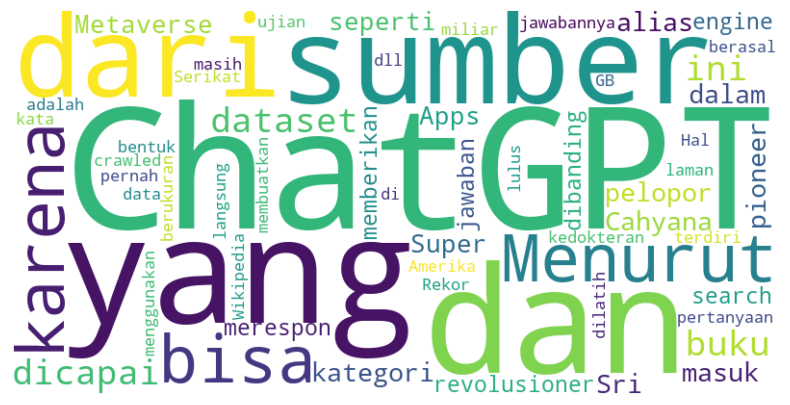

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Memisahkan teks menjadi kata-kata
words = train_data['full_text'].str.split().explode()

# Menggabungkan kata-kata menjadi satu string
all_words = ' '.join(words)

# Membuat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Menampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Preprocessing

In [12]:
import copy

train_data_copy = copy.deepcopy(train_data)


In [13]:
import copy

train_data_2 = copy.deepcopy(train_data)

## Case Folding

### Lowercase

In [14]:
def full_text_lowercase(full_text):
    full_text = full_text.lower()
    return full_text

In [15]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_lowercase)

CPU times: total: 0 ns
Wall time: 1 ms


In [16]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"Menurut Sri dan Cahyana, ChatGPT masuk dalam kategori pioneer alias pelopor seperti Super Apps dan Metaverse.","menurut sri dan cahyana, chatgpt masuk dalam kategori pioneer alias pelopor seperti super apps dan metaverse."
1,"ChatGPT revolusioner dibanding search engine yang memberikan sumber-sumber jawaban, karena bisa merespon pertanyaan langsung membuatkan bentuk sumber jawabannya.","chatgpt revolusioner dibanding search engine yang memberikan sumber-sumber jawaban, karena bisa merespon pertanyaan langsung membuatkan bentuk sumber jawabannya."
2,"Rekor yang pernah dicapai ChatGPT, masih menurut data dari buku ini, adalah lulus ujian kedokteran di Amerika Serikat (AS). Hal ini bisa dicapai karena ChatGPT dilatih menggunakan dataset 300 miliar kata yang berasal dari dataset berukuran 570 GB dan terdiri dari crawled laman, buku, Wikipedia dll.","rekor yang pernah dicapai chatgpt, masih menurut data dari buku ini, adalah lulus ujian kedokteran di amerika serikat (as). hal ini bisa dicapai karena chatgpt dilatih menggunakan dataset 300 miliar kata yang berasal dari dataset berukuran 570 gb dan terdiri dari crawled laman, buku, wikipedia dll."


In [17]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_lowercase)

CPU times: total: 0 ns
Wall time: 1e+03 µs


## Cleansing

### Menghapus username

In [18]:
def full_text_delete_username(full_text):
    userPattern       = '@[^\s]+'
    # Ngehapus kata "username" 
    full_text = re.sub(userPattern, '', full_text)
    
    return full_text

In [19]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_username)

CPU times: total: 0 ns
Wall time: 0 ns


In [20]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"menurut sri dan cahyana, chatgpt masuk dalam kategori pioneer alias pelopor seperti super apps dan metaverse.","menurut sri dan cahyana, chatgpt masuk dalam kategori pioneer alias pelopor seperti super apps dan metaverse."
1,"chatgpt revolusioner dibanding search engine yang memberikan sumber-sumber jawaban, karena bisa merespon pertanyaan langsung membuatkan bentuk sumber jawabannya.","chatgpt revolusioner dibanding search engine yang memberikan sumber-sumber jawaban, karena bisa merespon pertanyaan langsung membuatkan bentuk sumber jawabannya."
2,"rekor yang pernah dicapai chatgpt, masih menurut data dari buku ini, adalah lulus ujian kedokteran di amerika serikat (as). hal ini bisa dicapai karena chatgpt dilatih menggunakan dataset 300 miliar kata yang berasal dari dataset berukuran 570 gb dan terdiri dari crawled laman, buku, wikipedia dll.","rekor yang pernah dicapai chatgpt, masih menurut data dari buku ini, adalah lulus ujian kedokteran di amerika serikat (as). hal ini bisa dicapai karena chatgpt dilatih menggunakan dataset 300 miliar kata yang berasal dari dataset berukuran 570 gb dan terdiri dari crawled laman, buku, wikipedia dll."


In [21]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_username)

CPU times: total: 0 ns
Wall time: 998 µs


### Menghapus url

In [22]:
def full_text_delete_url(full_text):
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*|url)" #Pola ngehapus url
    full_text = re.sub(urlPattern, '', full_text)
    return full_text

In [23]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_url)

CPU times: total: 0 ns
Wall time: 1 ms


In [24]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"menurut sri dan cahyana, chatgpt masuk dalam kategori pioneer alias pelopor seperti super apps dan metaverse.","menurut sri dan cahyana, chatgpt masuk dalam kategori pioneer alias pelopor seperti super apps dan metaverse."
1,"chatgpt revolusioner dibanding search engine yang memberikan sumber-sumber jawaban, karena bisa merespon pertanyaan langsung membuatkan bentuk sumber jawabannya.","chatgpt revolusioner dibanding search engine yang memberikan sumber-sumber jawaban, karena bisa merespon pertanyaan langsung membuatkan bentuk sumber jawabannya."
2,"rekor yang pernah dicapai chatgpt, masih menurut data dari buku ini, adalah lulus ujian kedokteran di amerika serikat (as). hal ini bisa dicapai karena chatgpt dilatih menggunakan dataset 300 miliar kata yang berasal dari dataset berukuran 570 gb dan terdiri dari crawled laman, buku, wikipedia dll.","rekor yang pernah dicapai chatgpt, masih menurut data dari buku ini, adalah lulus ujian kedokteran di amerika serikat (as). hal ini bisa dicapai karena chatgpt dilatih menggunakan dataset 300 miliar kata yang berasal dari dataset berukuran 570 gb dan terdiri dari crawled laman, buku, wikipedia dll."


In [25]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_url)

CPU times: total: 0 ns
Wall time: 1 ms


### Menghapus kelebihan huruf

In [26]:
def full_text_delete_extra_letters(full_text):
    sequencePattern   = r'([A-Za-z])\1{2,}' #Pola ngehapus karakter yang punya kelebihan huruf
    seqReplacePattern = r'\1' #Pola ngereplace yang kelebihan huruf tiga kali
    full_text = re.sub(sequencePattern, seqReplacePattern, full_text)
    
    return full_text

In [27]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_extra_letters)

CPU times: total: 0 ns
Wall time: 1.01 ms


In [28]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"menurut sri dan cahyana, chatgpt masuk dalam kategori pioneer alias pelopor seperti super apps dan metaverse.","menurut sri dan cahyana, chatgpt masuk dalam kategori pioneer alias pelopor seperti super apps dan metaverse."
1,"chatgpt revolusioner dibanding search engine yang memberikan sumber-sumber jawaban, karena bisa merespon pertanyaan langsung membuatkan bentuk sumber jawabannya.","chatgpt revolusioner dibanding search engine yang memberikan sumber-sumber jawaban, karena bisa merespon pertanyaan langsung membuatkan bentuk sumber jawabannya."
2,"rekor yang pernah dicapai chatgpt, masih menurut data dari buku ini, adalah lulus ujian kedokteran di amerika serikat (as). hal ini bisa dicapai karena chatgpt dilatih menggunakan dataset 300 miliar kata yang berasal dari dataset berukuran 570 gb dan terdiri dari crawled laman, buku, wikipedia dll.","rekor yang pernah dicapai chatgpt, masih menurut data dari buku ini, adalah lulus ujian kedokteran di amerika serikat (as). hal ini bisa dicapai karena chatgpt dilatih menggunakan dataset 300 miliar kata yang berasal dari dataset berukuran 570 gb dan terdiri dari crawled laman, buku, wikipedia dll."


In [29]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_extra_letters)

CPU times: total: 0 ns
Wall time: 998 µs


### Menghapus Noise

In [30]:
def full_text_delete_noise(full_text):
        full_text = re.sub(r'(asslamu alaikum|assalamualaikum|asalamualaikum|assalamu\'alaikum|Assalamu alaikum|Assalamualaikum warahmatullahi wabarakatuh|ass wr\. wb\.|ass)', '', full_text)
        return full_text

In [31]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_noise)

CPU times: total: 0 ns
Wall time: 1 ms


In [32]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})

pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"menurut sri dan cahyana, chatgpt masuk dalam kategori pioneer alias pelopor seperti super apps dan metaverse.","menurut sri dan cahyana, chatgpt masuk dalam kategori pioneer alias pelopor seperti super apps dan metaverse."
1,"chatgpt revolusioner dibanding search engine yang memberikan sumber-sumber jawaban, karena bisa merespon pertanyaan langsung membuatkan bentuk sumber jawabannya.","chatgpt revolusioner dibanding search engine yang memberikan sumber-sumber jawaban, karena bisa merespon pertanyaan langsung membuatkan bentuk sumber jawabannya."
2,"rekor yang pernah dicapai chatgpt, masih menurut data dari buku ini, adalah lulus ujian kedokteran di amerika serikat (as). hal ini bisa dicapai karena chatgpt dilatih menggunakan dataset 300 miliar kata yang berasal dari dataset berukuran 570 gb dan terdiri dari crawled laman, buku, wikipedia dll.","rekor yang pernah dicapai chatgpt, masih menurut data dari buku ini, adalah lulus ujian kedokteran di amerika serikat (as). hal ini bisa dicapai karena chatgpt dilatih menggunakan dataset 300 miliar kata yang berasal dari dataset berukuran 570 gb dan terdiri dari crawled laman, buku, wikipedia dll."


In [33]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_noise)

CPU times: total: 0 ns
Wall time: 1.27 ms


### Menghapus new line dan new text

In [34]:
def full_text_delete_new_line_new_text(full_text):
    full_text = re.sub(r'\\[nt]', ' ', full_text)
    return full_text

In [35]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_new_line_new_text)

CPU times: total: 0 ns
Wall time: 1.3 ms


In [36]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"menurut sri dan cahyana, chatgpt masuk dalam kategori pioneer alias pelopor seperti super apps dan metaverse.","menurut sri dan cahyana, chatgpt masuk dalam kategori pioneer alias pelopor seperti super apps dan metaverse."
1,"chatgpt revolusioner dibanding search engine yang memberikan sumber-sumber jawaban, karena bisa merespon pertanyaan langsung membuatkan bentuk sumber jawabannya.","chatgpt revolusioner dibanding search engine yang memberikan sumber-sumber jawaban, karena bisa merespon pertanyaan langsung membuatkan bentuk sumber jawabannya."
2,"rekor yang pernah dicapai chatgpt, masih menurut data dari buku ini, adalah lulus ujian kedokteran di amerika serikat (as). hal ini bisa dicapai karena chatgpt dilatih menggunakan dataset 300 miliar kata yang berasal dari dataset berukuran 570 gb dan terdiri dari crawled laman, buku, wikipedia dll.","rekor yang pernah dicapai chatgpt, masih menurut data dari buku ini, adalah lulus ujian kedokteran di amerika serikat (as). hal ini bisa dicapai karena chatgpt dilatih menggunakan dataset 300 miliar kata yang berasal dari dataset berukuran 570 gb dan terdiri dari crawled laman, buku, wikipedia dll."


In [37]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_new_line_new_text)

CPU times: total: 0 ns
Wall time: 1.36 ms


### Menghapus Hastag

In [38]:
def full_text_remove_hashtags(full_text):
    hashtag= r'#\w+'
    full_text = re.sub(hashtag, '', full_text)
    return full_text

In [39]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_remove_hashtags)

CPU times: total: 0 ns
Wall time: 1.25 ms


In [40]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})

pd.options.display.max_colwidth = 150

display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"menurut sri dan cahyana, chatgpt masuk dalam kategori pioneer alias pelopor seperti super apps dan metaverse.","menurut sri dan cahyana, chatgpt masuk dalam kategori pioneer alias pelopor seperti super apps dan metaverse."
1,"chatgpt revolusioner dibanding search engine yang memberikan sumber-sumber jawaban, karena bisa merespon pertanyaan langsung membuatkan bentuk sumber jawabannya.","chatgpt revolusioner dibanding search engine yang memberikan sumber-sumber jawaban, karena bisa merespon pertanyaan langsung membuatkan bentuk sumber jawabannya."
2,"rekor yang pernah dicapai chatgpt, masih menurut data dari buku ini, adalah lulus ujian kedokteran di amerika serikat (as). hal ini bisa dicapai karena chatgpt dilatih menggunakan dataset 300 miliar kata yang berasal dari dataset berukuran 570 gb dan terdiri dari crawled laman, buku, wikipedia dll.","rekor yang pernah dicapai chatgpt, masih menurut data dari buku ini, adalah lulus ujian kedokteran di amerika serikat (as). hal ini bisa dicapai karena chatgpt dilatih menggunakan dataset 300 miliar kata yang berasal dari dataset berukuran 570 gb dan terdiri dari crawled laman, buku, wikipedia dll."


In [41]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_remove_hashtags)

CPU times: total: 0 ns
Wall time: 0 ns


### Menghapus angka

In [42]:
def full_text_delete_number(full_text):
    number = r'\d+' 
    full_text = re.sub(number, '', full_text)
    return full_text

In [43]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_number)

CPU times: total: 0 ns
Wall time: 1.04 ms


In [44]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"menurut sri dan cahyana, chatgpt masuk dalam kategori pioneer alias pelopor seperti super apps dan metaverse.","menurut sri dan cahyana, chatgpt masuk dalam kategori pioneer alias pelopor seperti super apps dan metaverse."
1,"chatgpt revolusioner dibanding search engine yang memberikan sumber-sumber jawaban, karena bisa merespon pertanyaan langsung membuatkan bentuk sumber jawabannya.","chatgpt revolusioner dibanding search engine yang memberikan sumber-sumber jawaban, karena bisa merespon pertanyaan langsung membuatkan bentuk sumber jawabannya."
2,"rekor yang pernah dicapai chatgpt, masih menurut data dari buku ini, adalah lulus ujian kedokteran di amerika serikat (as). hal ini bisa dicapai karena chatgpt dilatih menggunakan dataset 300 miliar kata yang berasal dari dataset berukuran 570 gb dan terdiri dari crawled laman, buku, wikipedia dll.","rekor yang pernah dicapai chatgpt, masih menurut data dari buku ini, adalah lulus ujian kedokteran di amerika serikat (as). hal ini bisa dicapai karena chatgpt dilatih menggunakan dataset miliar kata yang berasal dari dataset berukuran gb dan terdiri dari crawled laman, buku, wikipedia dll."


In [45]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_number)

CPU times: total: 0 ns
Wall time: 0 ns


### Menghapus tanda baca

In [46]:
def full_text_delete_punctuation(full_text):
    punctuationPattern = r'[^\w\s]' 
    full_text = re.sub(punctuationPattern, ' ', full_text)
    
    return full_text

In [47]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_punctuation)

CPU times: total: 0 ns
Wall time: 1 ms


In [48]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"menurut sri dan cahyana, chatgpt masuk dalam kategori pioneer alias pelopor seperti super apps dan metaverse.",menurut sri dan cahyana chatgpt masuk dalam kategori pioneer alias pelopor seperti super apps dan metaverse
1,"chatgpt revolusioner dibanding search engine yang memberikan sumber-sumber jawaban, karena bisa merespon pertanyaan langsung membuatkan bentuk sumber jawabannya.",chatgpt revolusioner dibanding search engine yang memberikan sumber sumber jawaban karena bisa merespon pertanyaan langsung membuatkan bentuk sumber jawabannya
2,"rekor yang pernah dicapai chatgpt, masih menurut data dari buku ini, adalah lulus ujian kedokteran di amerika serikat (as). hal ini bisa dicapai karena chatgpt dilatih menggunakan dataset miliar kata yang berasal dari dataset berukuran gb dan terdiri dari crawled laman, buku, wikipedia dll.",rekor yang pernah dicapai chatgpt masih menurut data dari buku ini adalah lulus ujian kedokteran di amerika serikat as hal ini bisa dicapai karena chatgpt dilatih menggunakan dataset miliar kata yang berasal dari dataset berukuran gb dan terdiri dari crawled laman buku wikipedia dll


In [49]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_punctuation)

CPU times: total: 0 ns
Wall time: 1.03 ms


### Menghapus Extra Spasi

In [50]:
def full_text_delete_extra_space(full_text):
    full_text = re.sub(r"\s+", " ", full_text)
    full_text = re.sub(r"^\s+|\s+$", "", full_text)
    
    return full_text

In [51]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_extra_space)

CPU times: total: 0 ns
Wall time: 1.01 ms


In [52]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,menurut sri dan cahyana chatgpt masuk dalam kategori pioneer alias pelopor seperti super apps dan metaverse,menurut sri dan cahyana chatgpt masuk dalam kategori pioneer alias pelopor seperti super apps dan metaverse
1,chatgpt revolusioner dibanding search engine yang memberikan sumber sumber jawaban karena bisa merespon pertanyaan langsung membuatkan bentuk sumber jawabannya,chatgpt revolusioner dibanding search engine yang memberikan sumber sumber jawaban karena bisa merespon pertanyaan langsung membuatkan bentuk sumber jawabannya
2,rekor yang pernah dicapai chatgpt masih menurut data dari buku ini adalah lulus ujian kedokteran di amerika serikat as hal ini bisa dicapai karena chatgpt dilatih menggunakan dataset miliar kata yang berasal dari dataset berukuran gb dan terdiri dari crawled laman buku wikipedia dll,rekor yang pernah dicapai chatgpt masih menurut data dari buku ini adalah lulus ujian kedokteran di amerika serikat as hal ini bisa dicapai karena chatgpt dilatih menggunakan dataset miliar kata yang berasal dari dataset berukuran gb dan terdiri dari crawled laman buku wikipedia dll


In [53]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_extra_space)

CPU times: total: 0 ns
Wall time: 1.01 ms


## Tokenization

In [54]:
from nltk.tokenize import word_tokenize 

In [55]:
def full_text_tokenize(full_text):
    return word_tokenize(full_text)

In [56]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_tokenize)

CPU times: total: 0 ns
Wall time: 9.64 ms


In [57]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,menurut sri dan cahyana chatgpt masuk dalam kategori pioneer alias pelopor seperti super apps dan metaverse,"[menurut, sri, dan, cahyana, chatgpt, masuk, dalam, kategori, pioneer, alias, pelopor, seperti, super, apps, dan, metaverse]"
1,chatgpt revolusioner dibanding search engine yang memberikan sumber sumber jawaban karena bisa merespon pertanyaan langsung membuatkan bentuk sumber jawabannya,"[chatgpt, revolusioner, dibanding, search, engine, yang, memberikan, sumber, sumber, jawaban, karena, bisa, merespon, pertanyaan, langsung, membuatkan, bentuk, sumber, jawabannya]"
2,rekor yang pernah dicapai chatgpt masih menurut data dari buku ini adalah lulus ujian kedokteran di amerika serikat as hal ini bisa dicapai karena chatgpt dilatih menggunakan dataset miliar kata yang berasal dari dataset berukuran gb dan terdiri dari crawled laman buku wikipedia dll,"[rekor, yang, pernah, dicapai, chatgpt, masih, menurut, data, dari, buku, ini, adalah, lulus, ujian, kedokteran, di, amerika, serikat, as, hal, ini, bisa, dicapai, karena, chatgpt, dilatih, menggunakan, dataset, miliar, kata, yang, berasal, dari, dataset, berukuran, gb, dan, terdiri, dari, crawled, laman, buku, wikipedia, dll]"


In [58]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_tokenize)

CPU times: total: 0 ns
Wall time: 1 ms


## Normalization

### Import Kamus

In [59]:
kamus_singkatan = pd.read_csv("./Dataset/kamus_singkatan.csv",names=["kata_gaul","kata_asal"],delimiter=";")
kamus_singkatan

,kata_gaul,kata_asal
0,aamiin,amin
1,adek,adik
2,adlh,adalah
3,aer,air
4,aiskrim,es krim
...,...,...
1304,yoi,iya
1305,yup,ya
1306,yups,ya
1307,yupz,ya


In [60]:
def create_kamus():
      kamus = {}
      for i in range(len(kamus_singkatan)):
          kamus[kamus_singkatan["kata_gaul"][i]]=kamus_singkatan["kata_asal"][i].lower().strip()
      return kamus

In [61]:
kamus = create_kamus()
kamus

{'aamiin': 'amin',
 'adek': 'adik',
 'adlh': 'adalah',
 'aer': 'air',
 'aiskrim': 'es krim',
 'aj': 'saja',
 'aja': 'saja',
 'ajah': 'saja',
 'ajalah': 'saja',
 'aje': 'saja',
 'ajh': 'saja',
 'ajj': 'saja',
 'aku': 'saya',
 'ak': 'saya',
 'akoh': 'saya',
 'akutu': 'saya',
 'aq': 'saya',
 'alesan': 'alasan',
 'ama': 'sama',
 'amaca': 'ah masa',
 'amuh': 'kamu',
 'ancur': 'hancur',
 'ane': 'saya',
 'anget': 'hangat',
 'anjeng': 'anjing',
 'ank': 'anak',
 'apah': 'apa',
 'aph': 'apa',
 'apo': 'apa',
 'apose': 'apa',
 'apz': 'apa',
 'artine': 'artinya',
 'asek': 'asik',
 'ati2': 'hati-hati',
 'atit': 'sakit',
 'atu': 'satu',
 'atw': 'atau',
 'ayang': 'sayang',
 'ayuk': 'ayo',
 'babang': 'abang',
 'bae': 'baik',
 'bais': 'habis',
 'bakalan': 'akan',
 'bales': 'balas',
 'bandingin': 'bandingkan',
 'banget': 'sekali',
 'bangett': 'sangat',
 'banyakin': 'perbanyak',
 'barengan': 'bersamaan',
 'baryaw': 'sabar ya',
 'baso': 'bakso',
 'bay': 'selamat tinggal',
 'bbrp': 'beberapa',
 'bc': 'baca'

In [62]:
def full_text_replace_contractions(full_text):
    pattern = re.compile(r'\b(' + '|'.join(re.escape(contraction) for contraction in kamus.keys()) + r')\b')
    full_text = pattern.sub(lambda x: kamus[x.group()], full_text)
    return full_text

In [63]:
%%time
for i in range(0,len(train_data)):
    himpunan_kata=[]
    for tokenize_full_text in train_data["full_text"][i]:
        tokenize_full_text = full_text_replace_contractions(tokenize_full_text)
        himpunan_kata.append(tokenize_full_text)
    train_data["full_text"][i]=himpunan_kata
    i+1

CPU times: total: 46.9 ms
Wall time: 96.1 ms


In [64]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"[menurut, sri, dan, cahyana, chatgpt, masuk, dalam, kategori, pioneer, alias, pelopor, seperti, super, apps, dan, metaverse]","[menurut, sri, dan, cahyana, chatgpt, masuk, dalam, kategori, pioneer, alias, pelopor, seperti, super, apps, dan, metaverse]"
1,"[chatgpt, revolusioner, dibanding, search, engine, yang, memberikan, sumber, sumber, jawaban, karena, bisa, merespon, pertanyaan, langsung, membuatkan, bentuk, sumber, jawabannya]","[chatgpt, revolusioner, dibanding, search, engine, yang, memberikan, sumber, sumber, jawaban, karena, bisa, merespon, pertanyaan, langsung, membuatkan, bentuk, sumber, jawabannya]"
2,"[rekor, yang, pernah, dicapai, chatgpt, masih, menurut, data, dari, buku, ini, adalah, lulus, ujian, kedokteran, di, amerika, serikat, as, hal, ini, bisa, dicapai, karena, chatgpt, dilatih, menggunakan, dataset, miliar, kata, yang, berasal, dari, dataset, berukuran, gb, dan, terdiri, dari, crawled, laman, buku, wikipedia, dll]","[rekor, yang, pernah, dicapai, chatgpt, masih, menurut, data, dari, buku, ini, adalah, lulus, ujian, kedokteran, di, amerika, serikat, as, hal, ini, bisa, dicapai, karena, chatgpt, dilatih, menggunakan, dataset, miliar, kata, yang, berasal, dari, dataset, berukuran, gb, dan, terdiri, dari, crawled, laman, buku, wikipedia, dan lain]"


In [65]:
%%time
for i in range(0,len(train_data_copy)):
    himpunan_kata=[]
    for tokenize_full_text in train_data_copy["full_text"][i]:
        tokenize_full_text = full_text_replace_contractions(tokenize_full_text)
        himpunan_kata.append(tokenize_full_text)
    train_data_copy["full_text"][i]=himpunan_kata
    i+1

CPU times: total: 0 ns
Wall time: 78 ms


### Stemming

In [66]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()

In [67]:
def tweet_stemming(tweet):
    # Check if the input is a list
    if isinstance(tweet, list):
        stemmed_tweets = []
        # Iterate through each tweet in the list
        for t in tweet:
            # Create a stemmer object
            stemmer = factory.create_stemmer()
            # Stem the tweet and append to the list of stemmed tweets
            stemmed_tweets.append(stemmer.stem(t))
        # Return the list of stemmed tweets
        return stemmed_tweets
    else:
        # If the input is not a list, create a stemmer object
        stemmer = factory.create_stemmer()
        # Stem the single tweet and return
        return stemmer.stem(tweet)

In [68]:
train_data["full_text"] = train_data["full_text"].apply(tweet_stemming)

In [69]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"[menurut, sri, dan, cahyana, chatgpt, masuk, dalam, kategori, pioneer, alias, pelopor, seperti, super, apps, dan, metaverse]","[turut, sri, dan, cahyana, chatgpt, masuk, dalam, kategori, pioneer, alias, pelopor, seperti, super, apps, dan, metaverse]"
1,"[chatgpt, revolusioner, dibanding, search, engine, yang, memberikan, sumber, sumber, jawaban, karena, bisa, merespon, pertanyaan, langsung, membuatkan, bentuk, sumber, jawabannya]","[chatgpt, revolusioner, banding, search, engine, yang, beri, sumber, sumber, jawab, karena, bisa, merespon, tanya, langsung, buat, bentuk, sumber, jawab]"
2,"[rekor, yang, pernah, dicapai, chatgpt, masih, menurut, data, dari, buku, ini, adalah, lulus, ujian, kedokteran, di, amerika, serikat, as, hal, ini, bisa, dicapai, karena, chatgpt, dilatih, menggunakan, dataset, miliar, kata, yang, berasal, dari, dataset, berukuran, gb, dan, terdiri, dari, crawled, laman, buku, wikipedia, dan lain]","[rekor, yang, pernah, capai, chatgpt, masih, turut, data, dari, buku, ini, adalah, lulus, uji, dokter, di, amerika, serikat, as, hal, ini, bisa, capai, karena, chatgpt, latih, guna, dataset, miliar, kata, yang, asal, dari, dataset, ukur, gb, dan, diri, dari, crawled, laman, buku, wikipedia, dan lain]"


In [70]:
train_data_copy["full_text"] = train_data_copy["full_text"].apply(tweet_stemming)

### Stopwords

In [71]:
def tweet_stopwords_removal(tweet):
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    tweet = stopword.remove(tweet)
    return tweet

In [72]:
%%time
for i in range(len(train_data)):
    himpunan_kata = []
    for tokenize_tweet in train_data["full_text"].iloc[i]:
        tokenize_tweet = tweet_stopwords_removal(tokenize_tweet)
        if tokenize_tweet == "":
            pass
        else:
            himpunan_kata.append(tokenize_tweet)
    train_data.at[i, "full_text"] = himpunan_kata


CPU times: total: 0 ns
Wall time: 2.16 ms


In [73]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"[turut, sri, dan, cahyana, chatgpt, masuk, dalam, kategori, pioneer, alias, pelopor, seperti, super, apps, dan, metaverse]","[turut, sri, cahyana, chatgpt, masuk, kategori, pioneer, alias, pelopor, super, apps, metaverse]"
1,"[chatgpt, revolusioner, banding, search, engine, yang, beri, sumber, sumber, jawab, karena, bisa, merespon, tanya, langsung, buat, bentuk, sumber, jawab]","[chatgpt, revolusioner, banding, search, engine, beri, sumber, sumber, jawab, merespon, tanya, langsung, buat, bentuk, sumber, jawab]"
2,"[rekor, yang, pernah, capai, chatgpt, masih, turut, data, dari, buku, ini, adalah, lulus, uji, dokter, di, amerika, serikat, as, hal, ini, bisa, capai, karena, chatgpt, latih, guna, dataset, miliar, kata, yang, asal, dari, dataset, ukur, gb, dan, diri, dari, crawled, laman, buku, wikipedia, dan lain]","[rekor, pernah, capai, chatgpt, turut, data, buku, lulus, uji, dokter, amerika, serikat, as, capai, chatgpt, latih, dataset, miliar, kata, asal, dataset, ukur, gb, diri, crawled, laman, buku, wikipedia, lain]"


## Result Preposessing

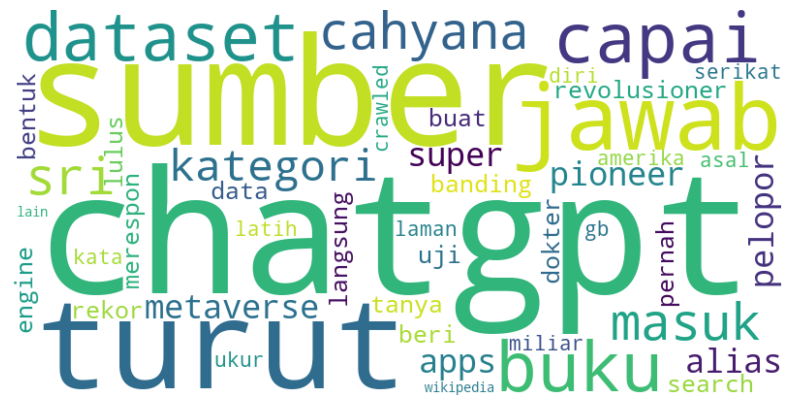

In [74]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert lists of full_texts into a single string
all_full_texts = ' '.join([full_text for sublist in train_data['full_text'] for full_text in sublist])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_full_texts)

# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [75]:
comparison_df = pd.DataFrame({
    'Before ': train_data_2['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"Menurut Sri dan Cahyana, ChatGPT masuk dalam kategori pioneer alias pelopor seperti Super Apps dan Metaverse.","[turut, sri, cahyana, chatgpt, masuk, kategori, pioneer, alias, pelopor, super, apps, metaverse]"
1,"ChatGPT revolusioner dibanding search engine yang memberikan sumber-sumber jawaban, karena bisa merespon pertanyaan langsung membuatkan bentuk sumber jawabannya.","[chatgpt, revolusioner, banding, search, engine, beri, sumber, sumber, jawab, merespon, tanya, langsung, buat, bentuk, sumber, jawab]"
2,"Rekor yang pernah dicapai ChatGPT, masih menurut data dari buku ini, adalah lulus ujian kedokteran di Amerika Serikat (AS). Hal ini bisa dicapai karena ChatGPT dilatih menggunakan dataset 300 miliar kata yang berasal dari dataset berukuran 570 GB dan terdiri dari crawled laman, buku, Wikipedia dll.","[rekor, pernah, capai, chatgpt, turut, data, buku, lulus, uji, dokter, amerika, serikat, as, capai, chatgpt, latih, dataset, miliar, kata, asal, dataset, ukur, gb, diri, crawled, laman, buku, wikipedia, lain]"


## TF-IDF

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Menggabungkan kata-kata dalam setiap dokumen menjadi kalimat
cleaned_texts = [' '.join(words) for words in train_data['full_text']]

# Inisialisasi objek TfidfVectorizer
vectorizer = TfidfVectorizer()

# Melakukan perhitungan TF-IDF
tfidf_matrix = vectorizer.fit_transform(cleaned_texts)

# Mendapatkan daftar kata-kata yang menjadi fitur
feature_names = vectorizer.get_feature_names_out()

# Mendapatkan nilai TF-IDF untuk setiap kata dalam setiap dokumen
tfidf_scores = tfidf_matrix.toarray()

# Membuat DataFrame untuk menampilkan hasil
tfidf_df = pd.DataFrame(tfidf_scores, columns=feature_names)
tfidf_df.index = [f"Dokumen {i+1}" for i in range(tfidf_scores.shape[0])]

# Menampilkan hasil dalam bentuk tabel
tfidf_df


,alias,amerika,apps,as,asal,banding,bentuk,beri,buat,buku,...,search,serikat,sri,sumber,super,tanya,turut,uji,ukur,wikipedia
Dokumen 1,0.302514,0.000000,0.302514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.302514,0.000000,0.302514,0.000000,0.230069,0.000000,0.000000,0.000000
Dokumen 2,0.000000,0.000000,0.000000,0.000000,0.000000,0.206951,0.206951,0.206951,0.206951,0.00000,...,0.206951,0.000000,0.000000,0.620853,0.000000,0.206951,0.000000,0.000000,0.000000,0.000000
Dokumen 3,0.000000,0.171565,0.000000,0.171565,0.171565,0.000000,0.000000,0.000000,0.000000,0.34313,...,0.000000,0.171565,0.000000,0.000000,0.000000,0.000000,0.130480,0.171565,0.171565,0.171565
